In [21]:
%load_ext autoreload
%autoreload 2

In [22]:
import sys
sys.path.append('/home/matt/perception')

import matplotlib
from RANSAC.plane_utils.estimate import estimate_plane
from RANSAC.plane_utils.test import test_plane
from plyfile import PlyData
from RANSAC.algo_utils.ransac import RANSAC_fn, RANSAC_noInit
from data.visualizePlaneAndPointCloud import plot_plane_and_points
import numpy as np

In [23]:
# reading a ply file and call the estimate_plane function
file_path = "/home/matt/perception/RANSAC/plane_utils/0000000599_0000000846.ply"

ply_data = PlyData.read(file_path)
vertex_data = ply_data["vertex"]

data_dict = {}

# Extract XYZ coordinates
x = np.array(vertex_data["x"])
y = np.array(vertex_data["y"])
z = np.array(vertex_data["z"])
data_dict["points"] = np.column_stack((x, y, z))

result = estimate_plane(data_dict["points"])
print(data_dict['points'])
print(result)

[[1228.3579 3937.3286  114.9498]
 [1233.1185 3936.3813  115.1426]
 [1236.4266 3935.8298  115.0769]
 ...
 [1227.891  3937.2134  115.8192]
 [1227.9049 3937.2104  115.717 ]
 [1234.338  3935.9265  117.7769]]
{'normal': array([-0.40074253,  0.2562134 ,  0.8796363 ], dtype=float32), 'point': array([1231.51 , 3910.29 ,  115.762], dtype=float32), 'fail': False}


In [24]:
test_result = test_plane(data = data_dict['points'], estimate = result)
test_result

38.85169982910156

In [29]:
best = RANSAC_fn(data=data_dict['points'], initial_estimate=result, estimate_fn=estimate_plane, test_fn=test_plane, max_retry=10, thresh=1)
print(best)
test_plane(data=[data_dict['points']], estimate=best)

0
1
2
3
4
5
6
7
8
9
{'normal': array([-0.0035599 ,  0.00805453, -0.99996126], dtype=float32), 'point': array([1145.969 , 3736.5417,  114.4203], dtype=float32), 'fail': False}


2.7434701919555664

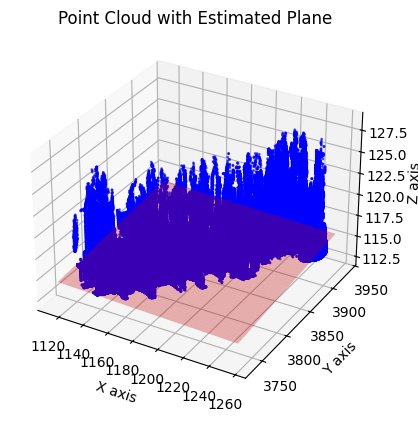

In [30]:
# ADD MATPLOTLIB STUFF
plot_plane_and_points(data_dict, best['normal'], best['point'])